# CODSOFT INTERNSHIP

# NAME : SUJI SHRI B

# TASK   : TITANIC SURVIVAL PREDICTION


# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Loading datasets :

In [20]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing :

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling missing values

In [31]:
df['Age'].fillna(df['Age'].median() , inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['PassengerId','Name','Ticket'] ,inplace=True)
df=pd.get_dummies(df,columns=['Sex','Embarked'] , drop_first=True)


# Visualizing the data

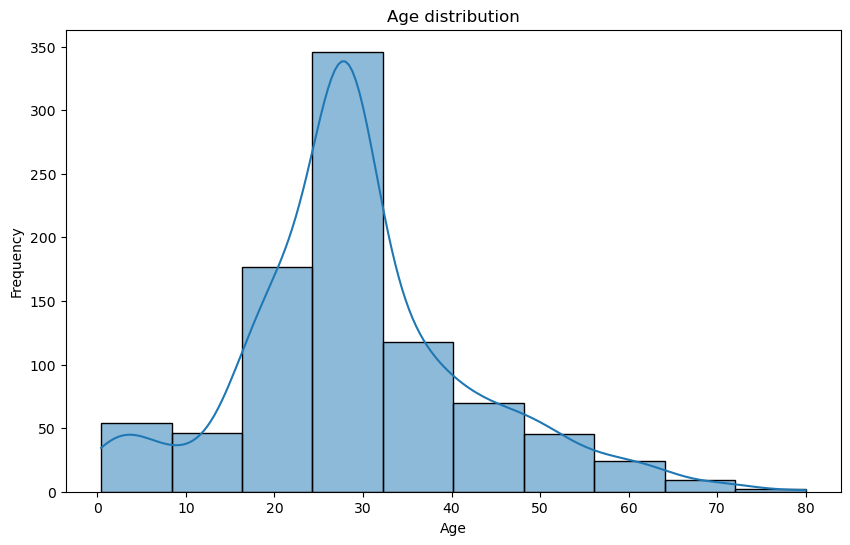

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,bins=10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


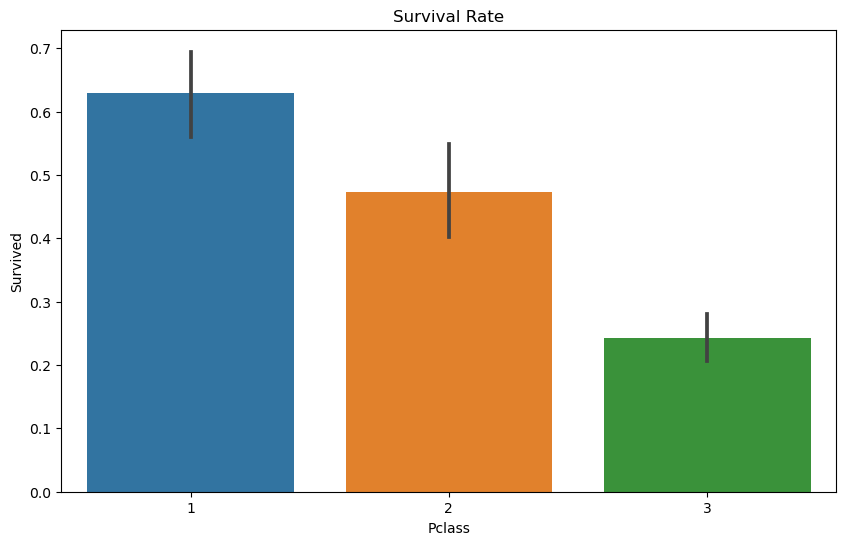

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

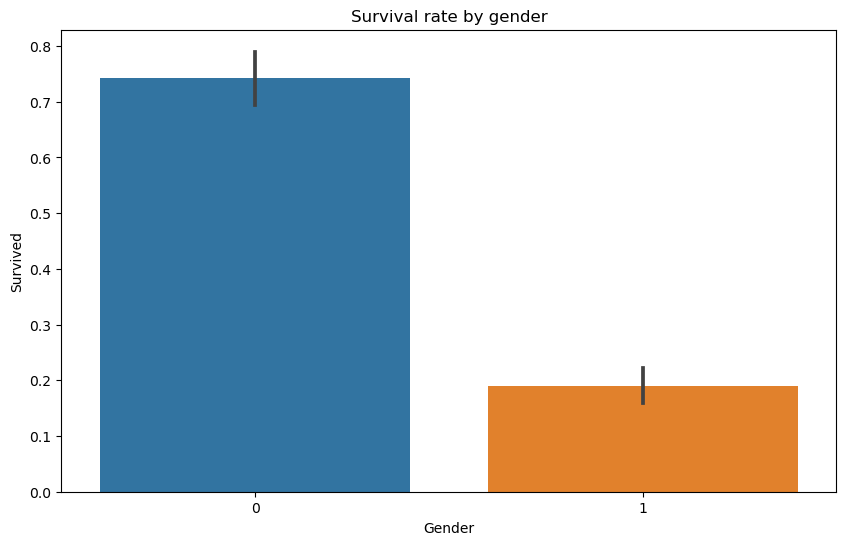

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sex_male',y='Survived',data=df)
plt.title('Survival rate by gender')
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.show()

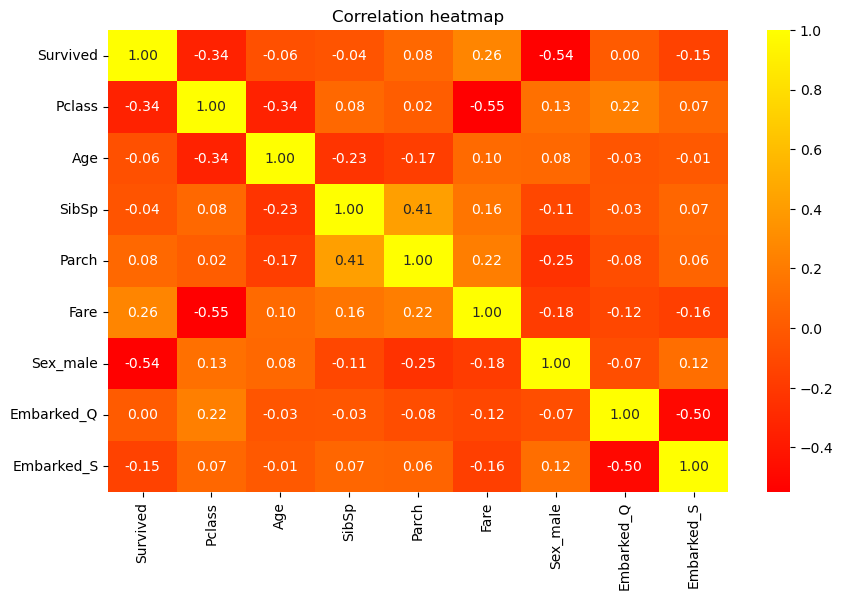

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='autumn',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()


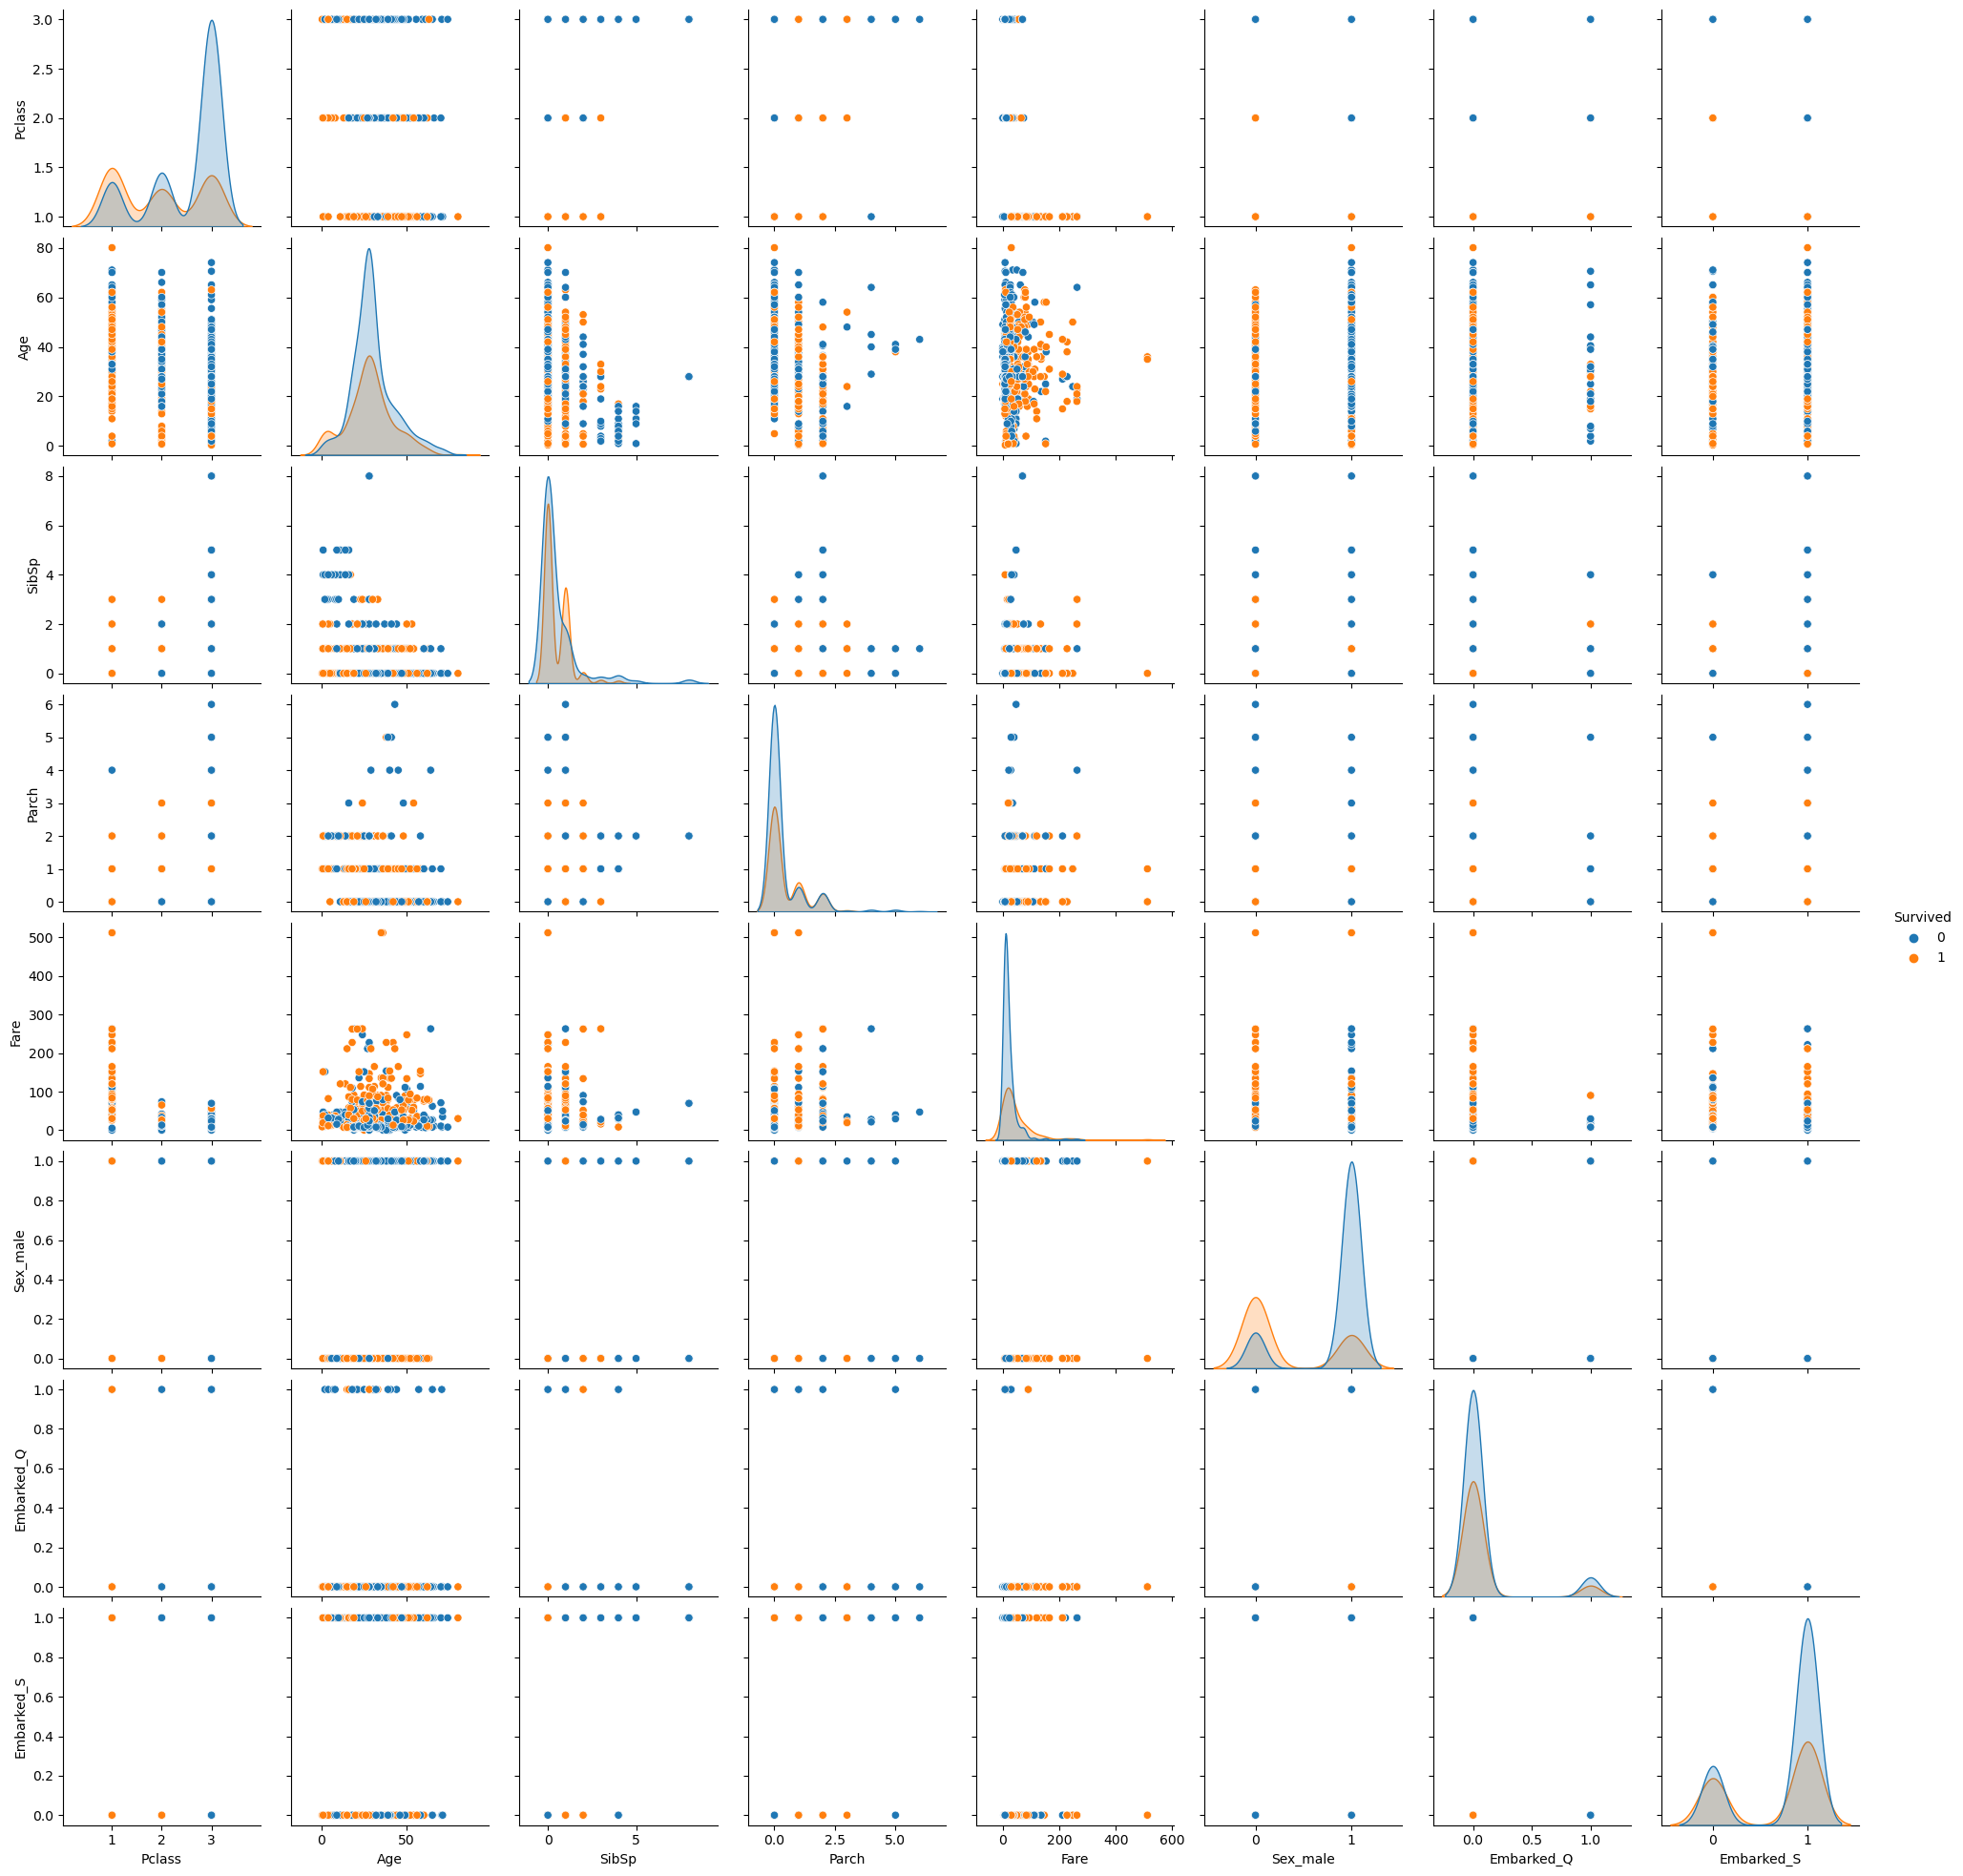

In [56]:
sns.pairplot(df,hue='Survived',diag_kind='kde')
plt.show()

# Training and Testing data:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Using Logistic Regression

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Evaluating ML Model

In [63]:

accu=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accu:.2f}')

conf=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', conf)

cl_re=classification_report(y_test,y_pred)
print('Classification Report:\n', cl_re)

Accuracy: 0.81
Confusion Matrix:
 [[136  21]
 [ 30  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

